In [54]:
from uncertainties import ufloat
from uncertainties.umath import log
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import elementary_charge as q
from scipy.constants import electron_mass as me
from time import perf_counter
pi= np.pi

In [2]:
def vth(Te, M = me):
    ''' Calculates average thermal speed for electrons '''
    return np.sqrt(8*q*Te / (pi*M))

In [100]:
ra     = 0.57e-3    # m
Te     = 2          # eV
nbp    = 1e16       # m-3
phi_sp = -10        # V
phi_bp = 0          # V
cbar   = vth(Te)    # might be one more 0
print(f"cbar = {cbar:0.1f} m/s")    
k1 = 2 * pi * ra**2 * q 
k2 = nbp*cbar/ 4
k3 = np.exp((phi_sp - phi_bp)/Te)
C = k1*k2*k3
print(f"C={C:0.2e}")

Ib = 0.27e-3 # A
Rebs = 0.001
print(f"{Ib*Rebs:0.2e}")



cbar = 946445.8 m/s
C=5.21e-06
2.70e-07


In [93]:
def g(x):
    return np.exp(x) - 1

def h(x):
    return x

def dg(x):
    return np.exp(x)
def dh(x):
    return 1

def Fplot(x):
    return g(x)*h(x)

def F(x, C=1e-5, B=2.7e-7):
    return C * (g(x)/h(x)) - B
    #return (g(x)/h(x)) - (B/C)

def DF(x, C=1e-5):
    return C*( dg(x)*h(x) - g(x)*dh(x) ) / (h(x)**2)


def newton(x0, f, Df, error, maxiter, **kwargs):
    ''' calculates the solution to f via Newtone Method'''
    xn = x0
    X = np.zeros(maxiter)
    for i in range(0, maxiter):
        X[i] = xn
        fxn  = f(xn, **kwargs)
        Dfxn = Df(xn, **kwargs)
        print(f"Guess = {xn:0.2f}, fxn = {fxn:0.2e}, Dfxn = {Dfxn:0.2e}")
        if abs(fxn) < error:
            print(f"Solution, {xn:0.2f}, found after {i} iterations.")
            return xn, i, X
        if Dfxn == 0:
            print('Zero derivative. No solution found.')
            #return None, i
            return xn, i, X
        xn = xn - fxn / Dfxn
        
    print(f'Hit max iterations without finding solution: {xn}')
    return xn, i, X


In [94]:
e = np.logspace(-10, -5)
print(e)


[1.00000000e-10 1.26485522e-10 1.59985872e-10 2.02358965e-10
 2.55954792e-10 3.23745754e-10 4.09491506e-10 5.17947468e-10
 6.55128557e-10 8.28642773e-10 1.04811313e-09 1.32571137e-09
 1.67683294e-09 2.12095089e-09 2.68269580e-09 3.39322177e-09
 4.29193426e-09 5.42867544e-09 6.86648845e-09 8.68511374e-09
 1.09854114e-08 1.38949549e-08 1.75751062e-08 2.22299648e-08
 2.81176870e-08 3.55648031e-08 4.49843267e-08 5.68986603e-08
 7.19685673e-08 9.10298178e-08 1.15139540e-07 1.45634848e-07
 1.84206997e-07 2.32995181e-07 2.94705170e-07 3.72759372e-07
 4.71486636e-07 5.96362332e-07 7.54312006e-07 9.54095476e-07
 1.20679264e-06 1.52641797e-06 1.93069773e-06 2.44205309e-06
 3.08884360e-06 3.90693994e-06 4.94171336e-06 6.25055193e-06
 7.90604321e-06 1.00000000e-05]


Guess = -1.00, fxn = 6.05e-06, Dfxn = 2.64e-06
Guess = -3.29, fxn = 2.66e-06, Dfxn = 7.76e-07
Guess = -6.71, fxn = 1.22e-06, Dfxn = 2.20e-07
Guess = -12.25, fxn = 5.46e-07, Dfxn = 6.66e-08
Guess = -20.45, fxn = 2.19e-07, Dfxn = 2.39e-08
Guess = -29.61, fxn = 6.77e-08, Dfxn = 1.14e-08
Guess = -35.55, fxn = 1.13e-08, Dfxn = 7.91e-09
Guess = -36.98, fxn = 4.37e-10, Dfxn = 7.31e-09
Guess = -37.04, fxn = 7.06e-13, Dfxn = 7.29e-09
Solution, -37.04, found after 8 iterations.
0.00 s


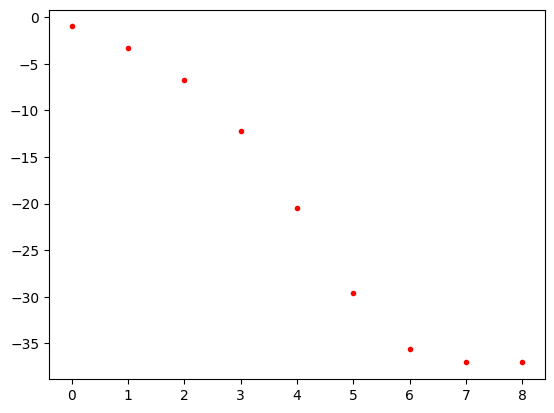

In [99]:
#x, iters= newton(-1, F, DF, error=1e-5, maxiter=10000) # keep this for the B/C term
t0 = perf_counter()
x, iters, X = newton(-1, F, DF, error=1e-12, maxiter=20)
print(f"{perf_counter()-t0:0.2f} s")
plt.plot(X[0:iters+1], 'r.')


Guess = -1.00, fxn = 6.05e-06, Dfxn = 2.64e-06
Guess = -3.29, fxn = 2.66e-06, Dfxn = 7.76e-07
Guess = -6.71, fxn = 1.22e-06, Dfxn = 2.20e-07
Guess = -12.25, fxn = 5.46e-07, Dfxn = 6.66e-08
Guess = -20.45, fxn = 2.19e-07, Dfxn = 2.39e-08
Guess = -29.61, fxn = 6.77e-08, Dfxn = 1.14e-08
Guess = -35.55, fxn = 1.13e-08, Dfxn = 7.91e-09
Guess = -36.98, fxn = 4.37e-10, Dfxn = 7.31e-09
Guess = -37.04, fxn = 7.06e-13, Dfxn = 7.29e-09
Solution, -37.04, found after 8 iterations.
Guess = -1.00, fxn = 6.05e-06, Dfxn = 2.64e-06
Guess = -3.29, fxn = 2.66e-06, Dfxn = 7.76e-07
Guess = -6.71, fxn = 1.22e-06, Dfxn = 2.20e-07
Guess = -12.25, fxn = 5.46e-07, Dfxn = 6.66e-08
Guess = -20.45, fxn = 2.19e-07, Dfxn = 2.39e-08
Guess = -29.61, fxn = 6.77e-08, Dfxn = 1.14e-08
Guess = -35.55, fxn = 1.13e-08, Dfxn = 7.91e-09
Guess = -36.98, fxn = 4.37e-10, Dfxn = 7.31e-09
Guess = -37.04, fxn = 7.06e-13, Dfxn = 7.29e-09
Solution, -37.04, found after 8 iterations.
Guess = -1.00, fxn = 6.05e-06, Dfxn = 2.64e-06
Guess =

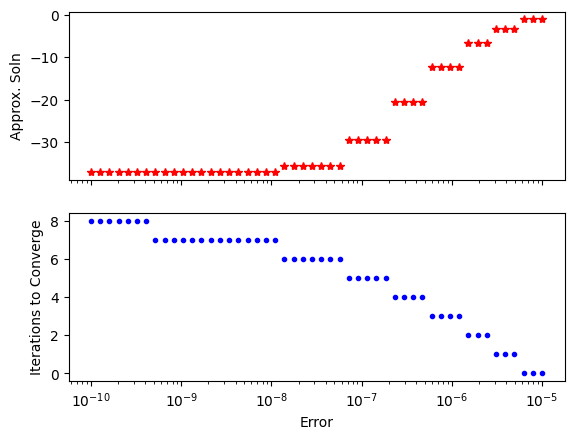

In [92]:
fig, axs = plt.subplots(2,1, sharex=True)
for ei in e:
    pn, iter = newton(-1, F, DF, error=ei, maxiter=1000000)
    axs[0].semilogx(ei, pn, 'r*')
    axs[1].semilogx(ei, iter, 'b.')

axs[1].set_xlabel('Error')
axs[1].set_ylabel('Iterations to Converge')
axs[0].set_ylabel('Approx. Soln')
plt.show()

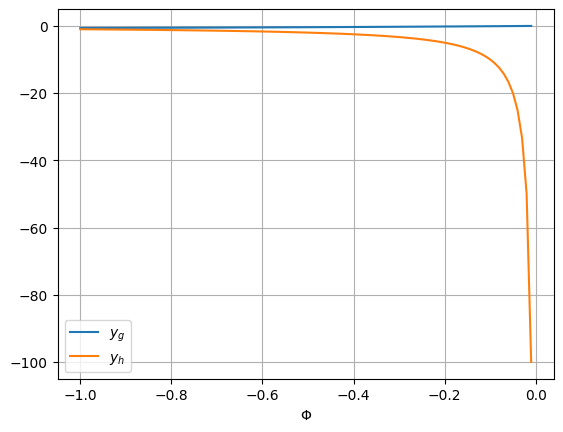

In [7]:
x = np.linspace(-1,-0.01, 100)
#y = Fplot(x)
yg = g(x)
yh = 1/h(x)
#plt.plot(x,y, label=r"y")
plt.plot(x,yg, label=r'$y_g$')
plt.plot(x,yh, label=r'$y_h$')
plt.grid()
plt.ylabel('')
plt.xlabel(r'$\Phi$')
plt.legend()

In [8]:
x_approx = newton(1, F, DF, 1e-2, 10000)
print(x_approx)
        

Solution, -27.02854552150325, found after 779 iterations.
(-27.02854552150325, 779)


Text(0, 0.5, '$\\frac{e^{\\Phi} - 1}{\\Phi}$')

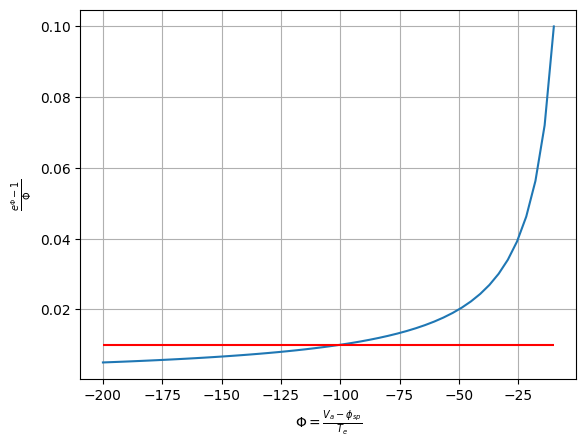

In [9]:
def B(x):
    return (np.exp(x)-1)/x
x = np.linspace(-200, -10)
Y = B(x)
plt.plot(x, Y)
plt.hlines(1e-2, min(x), max(x), colors='red')
plt.grid(which='both')
plt.xlabel(r"$\Phi = \frac{V_a - \phi_{sp}}{T_e}$")
plt.ylabel(r"$\frac{e^{\Phi} - 1}{\Phi}$")

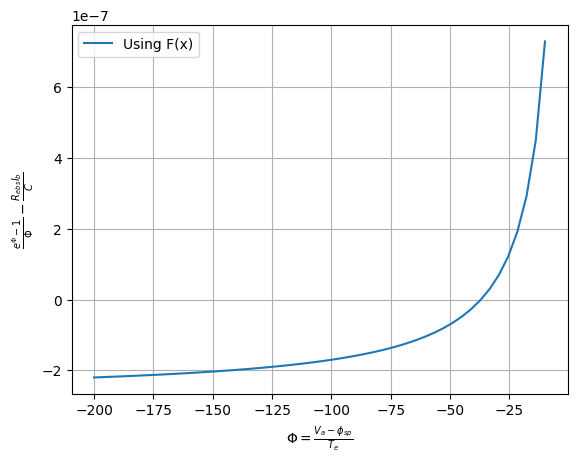

In [13]:
Y2 = B(x) - ((2.27e-7)/(1.04e-5))
Y_act = F(x)
#plt.plot(x, Y2, label='Manual Implementation')
plt.plot(x, Y_act, label = 'Using F(x)')
plt.grid(which='both')
plt.xlabel(r"$\Phi = \frac{V_a - \phi_{sp}}{T_e}$")
plt.ylabel(r"$\frac{e^{\Phi} - 1}{\Phi} - \frac{R_{ebs}I_b}{C}$")
plt.legend()


In [14]:
from scipy.optimize import minimize_scalar
PHI = minimize_scalar(F, bounds=[-100000, -10], method='bounded')
print(PHI)

     fun: -2.69899999997578e-07
 message: 'Solution found.'
    nfev: 37
     nit: 37
  status: 0
 success: True
       x: -99999.99757799444
